# Initial Data Exploration

---
---
## The Dataset

The dataset consists of ~150k wine reviews that were scraped from the [WineEnthusiast](http://www.winemag.com/?s=&drink_type=wine) websiet in 2017.
It is released under [CC BY-NC_SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license and can be [downloaded on kaggle](https://www.kaggle.com/zynicide/wine-reviews).

Each review contains additional information about the wine (designation, country, province, region, winery, variety and price), the reviewer (identifier) and the review (text, score [1-100])

---
Start with some installs

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
%matplotlib inline
def warn(string):
    display(Markdown('<span style="color:red">'+string+'</span>'))
def info(string):
    display(Markdown('<span style="color:blue">'+string+'</span>'))

**Let's load the dataset and have a first look!**

In [6]:
wr_df = pd.read_csv('data/winemag-data-130k-v2.csv')
wr_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Since we are dealing with text, making all lowercase makes it simpler to spot duplicates:

**We work with lowercase words only!**

In [3]:
for col in wr_df.columns:
    wr_df[col] = wr_df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)

---
---
## Data Quality Assessment & Data Exploration

Relevant for our analysis are the **description** and the **variety** columns.

**Data Quality:**
- Are there duplicate entries?
- Are there entries where one of the relevant columns is missing?
- Are there entries for which the `variety` is explicitely mentioned in the `description` column?
- Are the varieties categorized or do spelling errors exist?

**Exploration:**
- How many varieties are there?
- How are the varieties distributed?
- How long are the reviews?
- Do price, rating and the length of review correlate? (exploratory)

---
### Data Quality:
**Are there duplicate entries?**


In [4]:
# Check if the description column contains duplicates
for column in ['description']:
    info(f'Checking uniqueness of column `{column}`')
    nbr_all_entries = wr_df[column].size
    nbr_unique_entreis = wr_df[column].unique().size
    if nbr_all_entries != nbr_unique_entreis:
        warn(f'it contains {nbr_all_entries - nbr_unique_entreis} duplicates.')
    else:
        info(f'no duplicates')

<span style="color:blue">Checking uniqueness of column `description`</span>

<span style="color:red">it contains 10016 duplicates.</span>

In [5]:
# Lets get the duplicates and check if they are duplicate entries and have a look at them
descriptions_df = wr_df['description'].value_counts().to_frame().reset_index().rename(columns={'index':'description', 'description':'count'})
# inspect the first entries of those that have a count of > 1
for description in descriptions_df[descriptions_df['count'] > 1].description[:5]:
    display(Markdown('---'))
    display(wr_df[wr_df.description==description])

---

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
13143,13143,us,"cigar box, café au lait, and dried tobacco aro...",estate grown,88,30.0,washington,red mountain,columbia valley,sean p. sullivan,@wawinereport,ambassador vineyard 2013 estate grown syrah (r...,syrah,ambassador vineyard
25181,25181,us,"cigar box, café au lait, and dried tobacco aro...",estate grown,88,30.0,washington,red mountain,columbia valley,sean p. sullivan,@wawinereport,ambassador vineyard 2013 estate grown syrah (r...,syrah,ambassador vineyard
25182,25182,us,"cigar box, café au lait, and dried tobacco aro...",estate,88,30.0,washington,red mountain,columbia valley,sean p. sullivan,@wawinereport,ambassador vineyard 2013 estate syrah (red mou...,syrah,ambassador vineyard


---

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
16076,16076,argentina,"stalky aromas suggest hay and green herbs, wit...",finca la niña,84,10.0,mendoza province,mendoza,NaN,michael schachner,@wineschach,don cristobal 1492 2010 finca la niña malbec (...,malbec,don cristobal 1492
33110,33110,argentina,"stalky aromas suggest hay and green herbs, wit...",finca la niña,84,10.0,mendoza province,mendoza,NaN,michael schachner,@wineschach,don cristobal 1492 2010 finca la niña cabernet...,cabernet sauvignon,don cristobal 1492
48702,48702,argentina,"stalky aromas suggest hay and green herbs, wit...",finca la niña,84,10.0,mendoza province,mendoza,NaN,michael schachner,@wineschach,don cristobal 1492 2010 finca la niña malbec (...,malbec,don cristobal 1492


---

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4230,4230,italy,this zesty red has pretty aromas that suggest ...,NaN,88,30.0,tuscany,rosso di montalcino,NaN,kerin o’keefe,@kerinokeefe,ridolfi 2014 rosso di montalcino,sangiovese,ridolfi
19269,19269,italy,this zesty red has pretty aromas that suggest ...,NaN,87,30.0,tuscany,rosso di montalcino,NaN,kerin o’keefe,@kerinokeefe,carpineto 2014 rosso di montalcino,sangiovese,carpineto
61309,61309,italy,this zesty red has pretty aromas that suggest ...,NaN,88,30.0,tuscany,rosso di montalcino,NaN,kerin o’keefe,@kerinokeefe,ridolfi 2014 rosso di montalcino,sangiovese,ridolfi


---

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
12141,12141,us,"seductively tart in lemon pith, cranberry and ...",woods vineyard rosé of,91,29.0,california,russian river valley,sonoma,virginie boone,@vboone,ousterhout 2014 woods vineyard rosé of pinot n...,pinot noir,ousterhout
51822,51822,us,"seductively tart in lemon pith, cranberry and ...",800 vines jenna's vineyard rosé of,89,25.0,california,russian river valley,sonoma,virginie boone,@vboone,ousterhout 2014 800 vines jenna's vineyard ros...,pinot noir,ousterhout
119866,119866,us,"seductively tart in lemon pith, cranberry and ...",800 vines jenna's vineyard rosé of,89,25.0,california,russian river valley,sonoma,virginie boone,@vboone,ousterhout 2014 800 vines jenna's vineyard ros...,pinot noir,ousterhout


---

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
53296,53296,italy,"ripe plum, game, truffle, leather and menthol ...",NaN,88,72.0,tuscany,brunello di montalcino,NaN,kerin o’keefe,@kerinokeefe,la mannella 2011 brunello di montalcino,sangiovese,la mannella
126592,126592,italy,"ripe plum, game, truffle, leather and menthol ...",NaN,88,72.0,tuscany,brunello di montalcino,NaN,kerin o’keefe,@kerinokeefe,la mannella 2011 brunello di montalcino,sangiovese,la mannella
126930,126930,italy,"ripe plum, game, truffle, leather and menthol ...",NaN,87,40.0,tuscany,brunello di montalcino,NaN,kerin o’keefe,@kerinokeefe,poggiarellino 2011 brunello di montalcino,sangiovese,poggiarellino


duplicated descriptions do not always belong to the same variety.

**Decision on duplicates:**
- Drop entries with duplicated descriptions if the variety is the same.
- Keep entries with duplicated descriptions if the variety is different.

**Are there entries where one of the relevant columns is missing?**

Just a quick check if `variety` or `description` is empty:

In [6]:
# Are there duplicate entries?
for column in ['description', 'variety']:
    if True in wr_df[column].isnull().unique():
        incomplete_rows = wr_df[wr_df[column].isnull()]
        warn(f'`{column}` is incomplete. **{incomplete_rows.shape[0]}** entries are missing a value')
    else:
        info(f'`{column}` is complete.')


<span style="color:blue">`description` is complete.</span>

<span style="color:red">`variety` is incomplete. **1** entries are missing a value</span>

**Decision on missing values:**
- Since we deal with a single missing entry, we just delete it.

**Are there entries for which the `variety` is explicitely mentioned in the `description` column?**

In [7]:
# get all entries for which the variety is mentioned in the description
mentions = wr_df[wr_df.apply(lambda x: True if not isinstance(x.variety, float) and x.variety in x.description else False, axis=1)]
display(Markdown(f'**{mentions.shape[0]}** entries mention the variety in the description.'))

**25616** entries mention the variety in the description.

One way to deal with this could be to simply replace the variety by the string `variety`.

We then simply need to make sure to not use the word `varitey` as predictor for the variety (which would anyways not make much sense).

**Decision on `variety` mention in `description`:**
- Replace the mention in `description` by the string `'variety'`

**Are the varieties categorized or do spelling errors exist?**

We use the [Levenshtein distance](Levenshtein) to find words that are close to each other:

In [8]:
def levenshtein(a, b):
    """
    Just an implementation of the naive recursive algorithm.
    
    .. warning:: 
      This can be incredibly slow!
    """
    if not a:
        return len(b)
    if not b:
        return len(a)
    if a[0] == b[0]:
        return levenshtein(a[1:], b[1:])
    else:
        return 1 + min(levenshtein(a[1:], b),
                       levenshtein(a, b[1:]),
                       levenshtein(a[1:], b[1:]))

In [9]:
# let's get a faster function
!pip install jellyfish
from jellyfish import levenshtein_distance

     |████████████████████████████████| 94 kB 2.0 MB/s eta 0:00:011


In [10]:
varieties_array = wr_df[wr_df.apply(lambda x: True if isinstance(x.variety, str) else False, axis=1)].variety.values
varieties, counts = np.unique(varieties_array, return_counts=True)
display('variety 1, variety 2, levenshtein dist, number of occurrence of (variet1, variety 2)')
similar_pairs = sorted(((variety1, variety2, levenshtein_distance(variety1, variety2), (counts[i], counts[i+j]))
 for i, variety1 in enumerate(varieties)
 for j, variety2 in enumerate(varieties[i+1:])), key=lambda x: x[2])
# each entry will be (variety name, variety name, similarity)
display(similar_pairs[:40])

'variety 1, variety 2, levenshtein dist, number of occurrence of (variet1, variety 2)'

[('assyrtico', 'assyrtiko', 1, (43, 43)),
 ('carignan', 'carignane', 1, (77, 3)),
 ('carignan', 'carignano', 1, (77, 30)),
 ('carignane', 'carignano', 1, (30, 30)),
 ('cerceal', 'cercial', 1, (3, 3)),
 ('cercial', 'sercial', 1, (1, 53)),
 ('insolia', 'inzolia', 1, (33, 33)),
 ('malagousia', 'malagouzia', 1, (12, 12)),
 ('moscatel', 'muscatel', 1, (57, 3)),
 ('muscadel', 'muscatel', 1, (1, 3)),
 ('muscat', 'muskat', 1, (132, 3)),
 ('petit verdot', 'petite verdot', 1, (269, 770)),
 ('rosado', 'rosato', 1, (77, 77)),
 ('silvaner', 'sylvaner', 1, (39, 6)),
 ('siria', 'sirica', 1, (12, 12)),
 ('tinta de toro', 'tinta del toro', 1, (166, 2)),
 ('tinta del pais', 'tinto del pais', 1, (2, 1)),
 ('vidal', 'vital', 1, (11, 5)),
 ('vranac', 'vranec', 1, (1, 1)),
 ('xinisteri', 'xynisteri', 1, (1, 33)),
 ('aragonez', 'aragonês', 2, (10, 10)),
 ('azal', 'bual', 2, (3, 5)),
 ('bical', 'bobal', 2, (13, 232)),
 ('bical', 'bual', 2, (13, 5)),
 ('bical', 'vidal', 2, (13, 1)),
 ('bical', 'vital', 2, (13,

For most of the very similar pairs at least one of the variants appears rarely in the dataset.

Before taking a decision we will explore how many different varieties there are and how often they occur. 
We might end up using only a fraction of the varieties, especially if a small subset of varieties accounts for most of the reviews.
In this cas we might discard rows with less frequent varieties which might remove most of the very similar variety values we observe here.


**Decision on variety cathegorization:**

- We first have a closer look at the variety column!

---
### Data Exploration

**How many varieties are there?**

In [11]:
all_varieties = wr_df.variety.unique()
print(f'The variety column has {len(all_varieties)} unique entries.')

The variety column has 708 unique entries.


Now let's have a closer look at how frequent each value appears:

In [12]:
nbr_entries = wr_df.shape[0]
varieties_df = pd.DataFrame({'count':wr_df.groupby('variety', ).variety.count().sort_values(ascending=False)})
# add the fraction of entries that belong to this variety
varieties_df['fract'] = varieties_df['count']/nbr_entries
# check how many varieties are needed to get 95% of all entries
fraction = 0
limit_fraction = 0.9
up_to = 1
while fraction <= 0.9:
    fraction = varieties_df.iloc[:up_to].fract.sum()
    up_to += 1
    
info(f'The most common **{up_to}** varieties make up {100 * limit_fraction}% of the entries.')

# since the df is already sorted, wo we can just use iloc and get the first 'up_to' reviews
common = varieties_df.iloc[:up_to].index.values
wr_selection = wr_df[wr_df.variety.isin(common)]
print(f'We are left with {wr_selection.shape[0]} entries.')

<span style="color:blue">The most common **58** varieties make up 90.0% of the entries.</span>

We are left with 117417 entries.


**How are the varieties distributed?**


### **58 most represented varieties in the reviews**

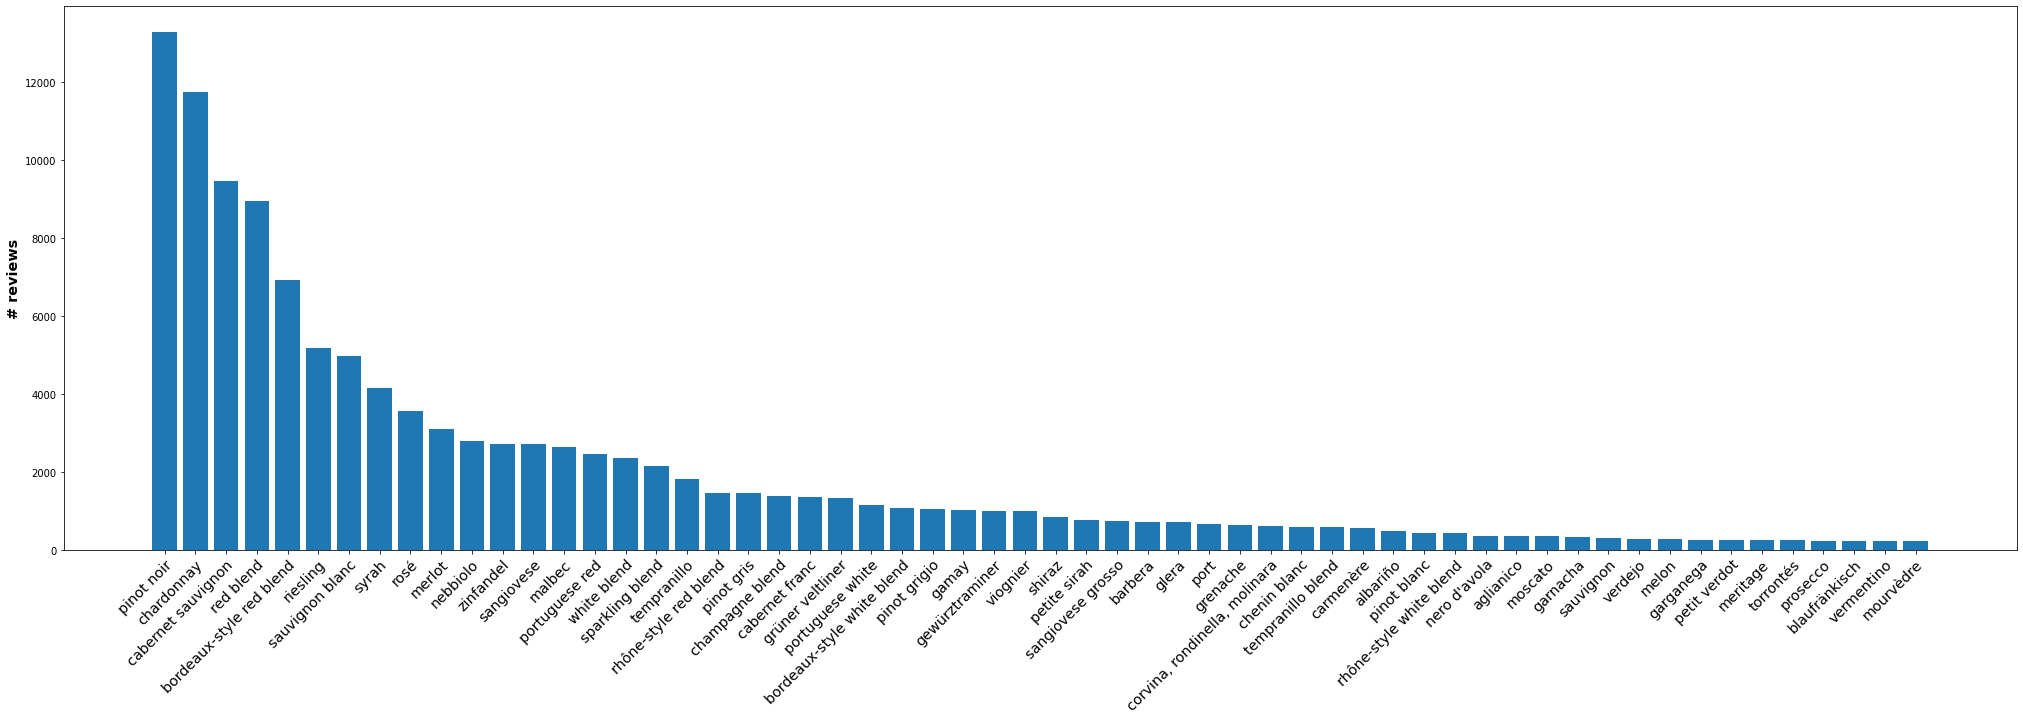

In [13]:
display(Markdown(f'\n### **{len(common)} most represented varieties in the reviews**'))
fig, ax = plt.subplots(figsize=(35, 10))
common_df = varieties_df[varieties_df.index.isin(common)]
all_varieties = wr_selection.variety.unique()
ax.bar(common_df.index.values, common_df['count'])
plt.xticks(rotation=45, fontsize='x-large', ha='right', va='top', rotation_mode='anchor')
ax.set_ylabel('# reviews', fontweight='bold', fontsize='x-large')
plt.show()

---
Resolve the open question from data quality assessment:

**Are the varieties categorized or do spelling errors exist?**

We now can have a look at only the common varieties and check how similar these values are:

In [14]:
display('variety 1, variety 2, levenshtein dist')
similar_pairs = sorted(((variety1, variety2, levenshtein_distance(variety1, variety2))
 for i, variety1 in enumerate(common)
 for variety2 in common[i+1:]), key=lambda x: x[2])
# each entry will be (variety name, variety name, similarity)
display(similar_pairs[:10])

'variety 1, variety 2, levenshtein dist'

[('merlot', 'melon', 2),
 ('pinot noir', 'pinot gris', 3),
 ('syrah', 'shiraz', 3),
 ('rosé', 'port', 3),
 ('pinot gris', 'pinot grigio', 3),
 ('grenache', 'garnacha', 3),
 ('syrah', 'gamay', 4),
 ('syrah', 'glera', 4),
 ('syrah', 'port', 4),
 ('merlot', 'port', 4)]

It seems that small differences are cuased by the spelling in different languages (e.g. italina 'rosato' and spanish 'rosado')

**Decision on variety cathegorization:**

- We will will only consider the most common wine varieties that make up 95% of the reivews.
- We'll use the varieties as is.

It is hard to tell whether 'pinot blanc' is just 'pinot blanco' in french or whether these are two varieties on cultivated in France and one in Spain. 

---
Let's go back to data exploration:

**How long are the reviews?**

We want to assess the lenght of the reviews in terms of numbers of sentences and numbers of words.
We will use the `nltk` package to help us with splitting the text into sentences and words:

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /home/jonas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
desc_sentences = wr_df.description.apply(lambda x: sent_tokenize(x)).to_frame()
desc_sentences['length'] = desc_sentences['description'].apply(lambda x: len(x))
desc_words= wr_df.description.apply(lambda x: word_tokenize(x)).to_frame()
desc_words['length'] = desc_words['description'].apply(lambda x: len(x))


### **Length of the reviews in words and sentences.**

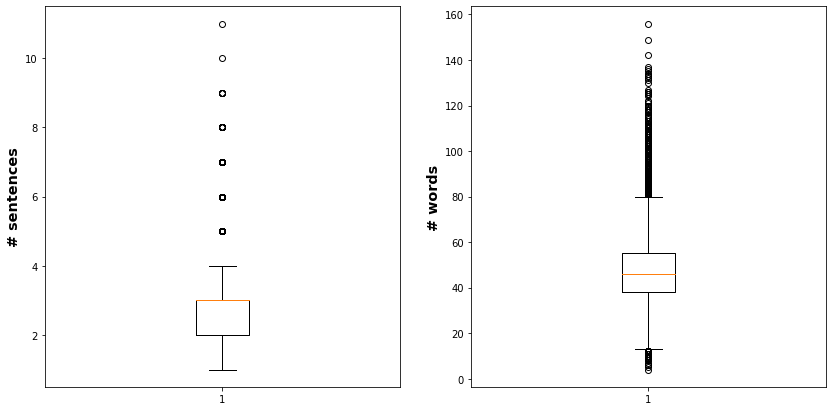

In [17]:
display(Markdown(f'\n### **Length of the reviews in words and sentences.**'))
fig, axs = plt.subplots(1,2,figsize=(14, 7))
s_range = min(desc_sentences.length.values), max(desc_sentences.length.values)
w_range = min(desc_words.length.values), max(desc_words.length.values)
axs[0].boxplot(desc_sentences.length.values)
axs[1].boxplot(desc_words.length.values)
# as histogram
# axs[0].hist(wr_df.desc_length_sentences.values, bins=s_range[1] - s_range[0])
# axs[1].hist(wr_df.desc_length_words.values, bins=w_range[1] - w_range[0])
axs[0].set_ylabel('# sentences', fontweight='bold', fontsize='x-large')
axs[1].set_ylabel('# words', fontweight='bold', fontsize='x-large')
plt.show()

**How do price, rating and review length correlate? (exploratory)**

We will use [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) which is a non-parametric measure that does not assume linearity.

The Spearman's rank correlation is a value in the interval `[-1, 1]`, with -1/+1 indicating a perfect monotonically decreasing/increasing function.

Text(0.5, 1.0, "Spearman's rank correlation")

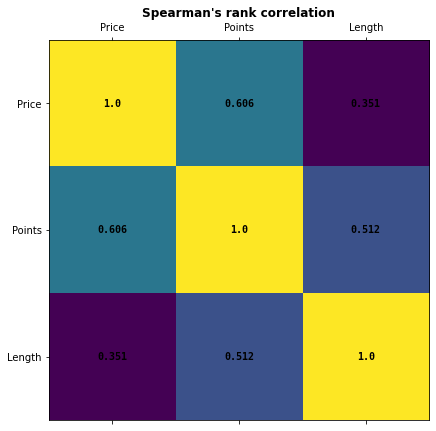

In [18]:
ppr_df = wr_df.loc[:,['price', 'points']]
ppr_df['length'] = desc_words.length
fig, ax = plt.subplots(figsize=(7,7))
corrm = ppr_df.corr('spearman')
ax.matshow(corrm)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(map(str.title, ppr_df.columns))
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(map(str.title, ppr_df.columns))
for row in range(3):
    for col in range(3):
        corrval = corrm.iloc[row, col]
        ax.text(col, row, round(corrval, 3),
                ha='center', va='center',
                fontfamily='monospace',
                fontweight='heavy')
ax.set_title('Spearman\'s rank correlation', fontdict=dict(weight='bold'))

**There is a positive correlation between all 3 pairs (price-points, price-length, points-length) with the highest correlation between the price of a bottle and the score it received**

---